In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [2]:
#load data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

# xtrain=xtrain[:6000,:,:]
# xtest=xtest[:2000,:,:]
xtrain.shape, xtest.shape
# print(xtrain)

((60000, 28, 28), (10000, 28, 28))

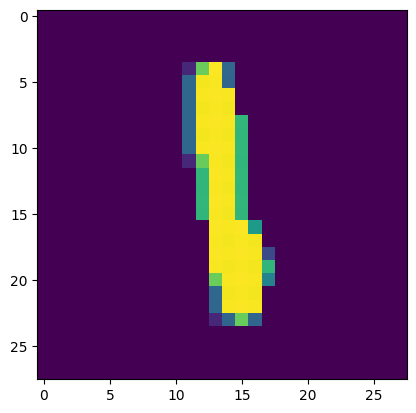

1


In [3]:
plt.imshow(xtrain[200])
plt.show()
print(ytrain[200])


In [4]:
# xtrain=xtrain.reshape((-1,28,28,3))
# xtest=xtest.reshape((-1,28,28,3))
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
#normalize the data
xtrain=xtrain/255.
xtest=xtest/255.

In [6]:
model = Sequential([
    # 1st convolutional layer 
    Conv2D(filters=96, input_shape=(28,28,1),kernel_size=(11,11),strides=(4,4),padding='valid',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    BatchNormalization(),

    # 2nd Convolutional layer
    # Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    # MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    # BatchNormalization(),

    # #3d Convolutional layer
    # Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    # # MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    # BatchNormalization(),

    # #4th convolutional layer
    # Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    # # MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    # BatchNormalization(),

    # #5th convolutional layer
    # Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
    # MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'),
    # BatchNormalization(),

    Flatten(),

    #1st Dense layer
    Dense(4096, input_shape=(28,28,1), activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    #2nd Dense layer
    Dense(4096, activation='relu'),
    Dropout(0.4),
    BatchNormalization(),

    #output layer
    Dense(10, activation='softmax')
    
])

In [7]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
y=to_categorical(ytrain)
ytrain.shape, xtrain.shape

((60000,), (60000, 28, 28))

In [8]:
model.fit(x=xtrain,y=to_categorical(ytrain),epochs=10,batch_size=64,shuffle=True)

Epoch 1/10
938/938 [==============================] - 19s 7ms/step - loss: 0.2558 - accuracy: 0.9398
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1375 - accuracy: 0.9647
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1056 - accuracy: 0.9726
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0932 - accuracy: 0.9750
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0891 - accuracy: 0.9766
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0744 - accuracy: 0.9798
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0689 - accuracy: 0.9818
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0560 - accuracy: 0.9838
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0556 - accuracy: 0.9843
Epoch 10/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0469 - accuracy: 0.986

In [10]:
eval = model.evaluate(xtest, to_categorical(ytest))
print(eval)

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9846
[0.07034025341272354, 0.9846000075340271]


4/4 [==============================] - 1s 24ms/step


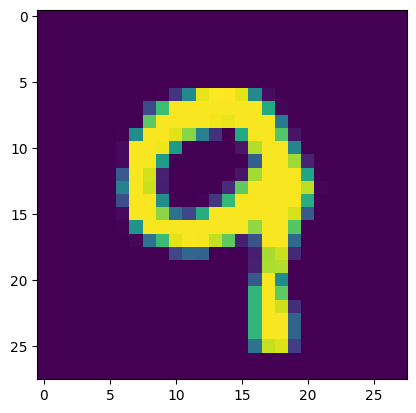

predictions: 9


In [11]:
# Predictions
predictions = model.predict(xtest[0:100])


plt.imshow(xtest[99].reshape(28,28))
plt.show()
print(f'predictions: {np.argmax(predictions[99])}')

In [24]:
from tensorflow.keras.preprocessing import image 
img = image.load_img(r"E:\python\python_projects\deepfaceTensorflow\data\numbers\6.png",target_size=(28,28),color_mode='grayscale')
input_image=image.img_to_array(img)
input_image=input_image/255

input_image.reshape(input_image.shape[0],input_image.shape[1])
print(input_image.shape, xtest[0:100].shape)
prediction2=model.predict(input_image)

(28, 28, 1) (100, 28, 28)


InvalidArgumentError: Graph execution error:

transpose expects a vector of size 3. But input(1) is a vector of size 4
	 [[{{node sequential/conv2d/Conv2D-0-TransposeNHWCToNCHW-LayoutOptimizer}}]] [Op:__inference_predict_function_42296]